In [1]:
#Importing all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


# Understanding the dataset

In [2]:
#load the dataset file
heart_df=pd.read_csv("Heart_disease_data.csv")

In [3]:
#print the top 5 rows of the dataset to get a breif.
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Understanding the data by deriving all necessary information about the dataset.
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
#checking the number of entries of data.
heart_df.shape


(1025, 14)

In [6]:
#checking the last 5 rows to conduct a better analysis.
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Cleaning the data

In [7]:
#checking for null values if any.
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#checking for duplicates if any
heart_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [9]:
heart_df_cleaned=heart_df.drop_duplicates()

In [10]:
heart_df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
heart_df_cleaned.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

In [12]:
#These column names do not clearly depict what the column means so the column names should be changed. 

In [13]:
new_column_names={
    'age':'age_years',
    'sex':'gender',
    'cp':'chest_pain_type',
    'trestbps':'resting_blood_pressure',
    'chol':'serum_cholestrol',
    'fbs':'fasting_blood_sugar',
    'restecg':'resting_ecg_results',
    'thalach':'max_heart_rate',
    'exang':'exercise_induced_angina',
    'oldpeak':'st_depression',
    'slope':'st_slope',
    'ca':'num_major_vessels',
    'thal':'thalassemia',
    'target':'heart_disease_present'
}
heart_df_cleaned=heart_df_cleaned.rename(columns=new_column_names)
print(heart_df_cleaned.columns)

Index(['age_years', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestrol', 'fasting_blood_sugar', 'resting_ecg_results',
       'max_heart_rate', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia',
       'heart_disease_present'],
      dtype='object')


In [14]:
heart_df_cleaned.head()

,age_years,gender,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease_present
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
#drop the null values if any
heart_df_cleaned.dropna()

,age_years,gender,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease_present
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [16]:
heart_df_cleaned.tail()

,age_years,gender,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease_present
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# EDA

To understand if there is a significant different in max_heart_rate among people with or without heart diseases.

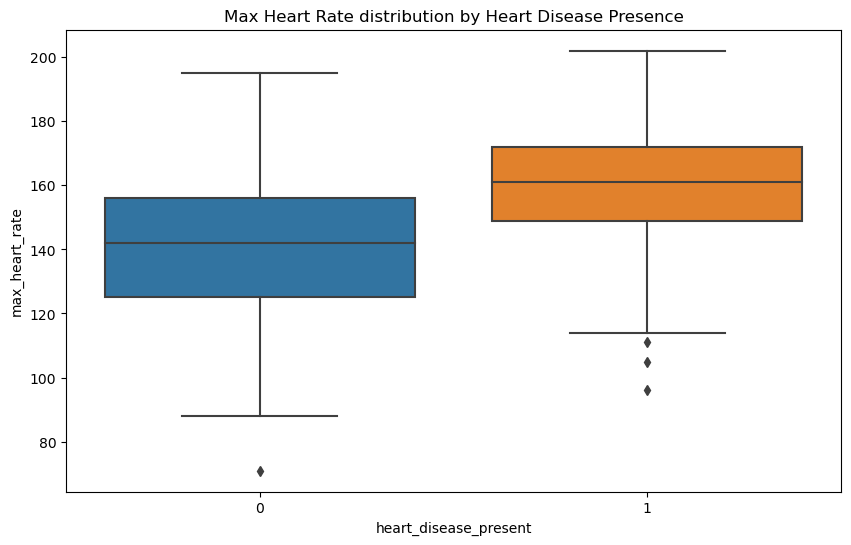

NameError: name 'stats' is not defined

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='heart_disease_present',y='max_heart_rate',data=heart_df_cleaned)
plt.title('Max Heart Rate distribution by Heart Disease Presence')
plt.show()
t_stat,p_value=stats.ttest_ind(
heart_df_cleaned[heart_df_cleaned['heart_disease_present']==1]['max_heart_rate'],
heart_df_cleaned[heart_df_cleaned['heart_disease_present']==0]['max_heart_rate']
)
print(f"t-statistic:{t_stat},p_value:{p_value}")
    

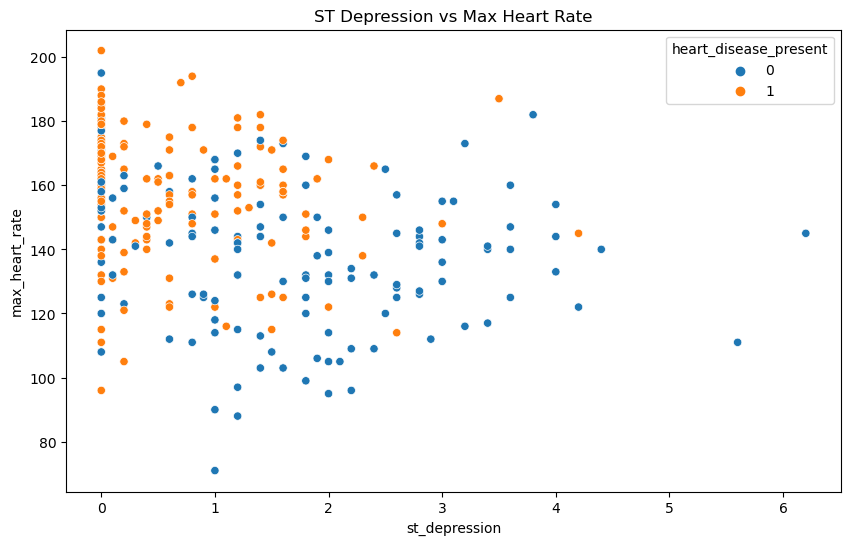

Correlation between ST depression and max heart rate: -0.34


In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='st_depression', y='max_heart_rate', hue='heart_disease_present', data=heart_df_cleaned)
plt.title('ST Depression vs Max Heart Rate')
plt.show()

correlation = heart_df_cleaned['st_depression'].corr(heart_df_cleaned['max_heart_rate'])
print(f"Correlation between ST depression and max heart rate: {correlation:.2f}")

How does the combination of exercise induced angina and ST depression relate to heart disease?

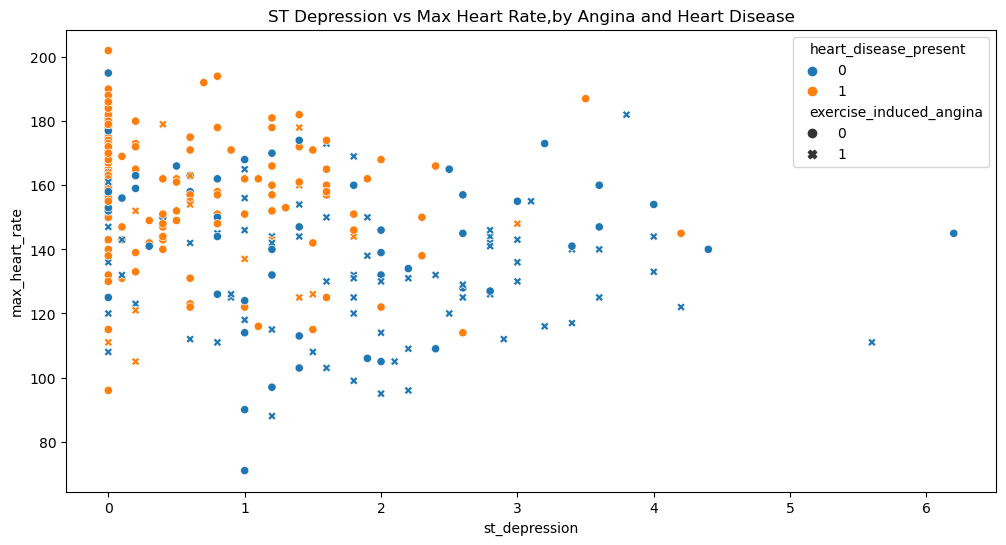

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='st_depression',y='max_heart_rate',hue='heart_disease_present',
               style='exercise_induced_angina',data=heart_df_cleaned)
plt.title('ST Depression vs Max Heart Rate,by Angina and Heart Disease')
plt.show()

In [21]:
#calculate average heart disease presence for different combinations.

In [22]:
grouped=heart_df_cleaned.groupby(['exercise_induced_angina',pd.cut(heart_df_cleaned['st_depression'],bins=3)])['heart_disease_present'].mean().unstack()
print("Average heart disease presence:")
print(grouped)

Average heart disease presence:
st_depression            (-0.0062, 2.067]  (2.067, 4.133]  (4.133, 6.2]
exercise_induced_angina                                                
0                                0.741758        0.277778      0.333333
1                                0.314286        0.037037      0.000000
